In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

from utils import pandas_label_encode

#### Dataset Processing
* Just encode categorical values

In [2]:
data = pd.read_csv("data/employee_data.csv")
X = data.drop(['employee_id', 'enrolled'], axis=1)
y = data['enrolled']

data = data.drop(columns=["employee_id","region"])
numeric_features     = ['age', 'salary', 'tenure_years']
categorical_features = ['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']

encode_gender, labels_gender = pandas_label_encode(data["gender"])
encode_marital_status, labels_marital = pandas_label_encode(data["marital_status"])
encode_has_dependents_status, labels_has_dependents = pandas_label_encode(data['has_dependents'])
encode_employmenttype_status, labels_employment_type = pandas_label_encode(data['employment_type'])

data["gender"] = encode_gender
data["marital_status"] = encode_marital_status
data['has_dependents'] = encode_has_dependents_status
data['employment_type'] = encode_employmenttype_status

#### Target Data Distribution Check
* Looks fairly distributed

Text(0, 0.5, 'count')

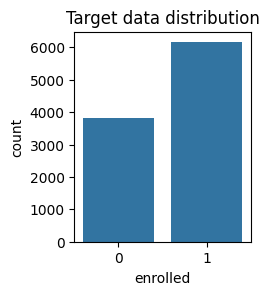

In [3]:
plt.figure(figsize=(5, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='enrolled', data=data)
plt.title('Target data distribution')
plt.xlabel('enrolled')
plt.ylabel('count')

### Data Visualization S1:
* Plot below describes between employment type and being enrolled.
* Nicely shows being full time has high chance.
* Being contract or part time still has chances to get enrolled if salary is in high band.

{'Contract': 0, 'Full-time': 1, 'Part-time': 2}


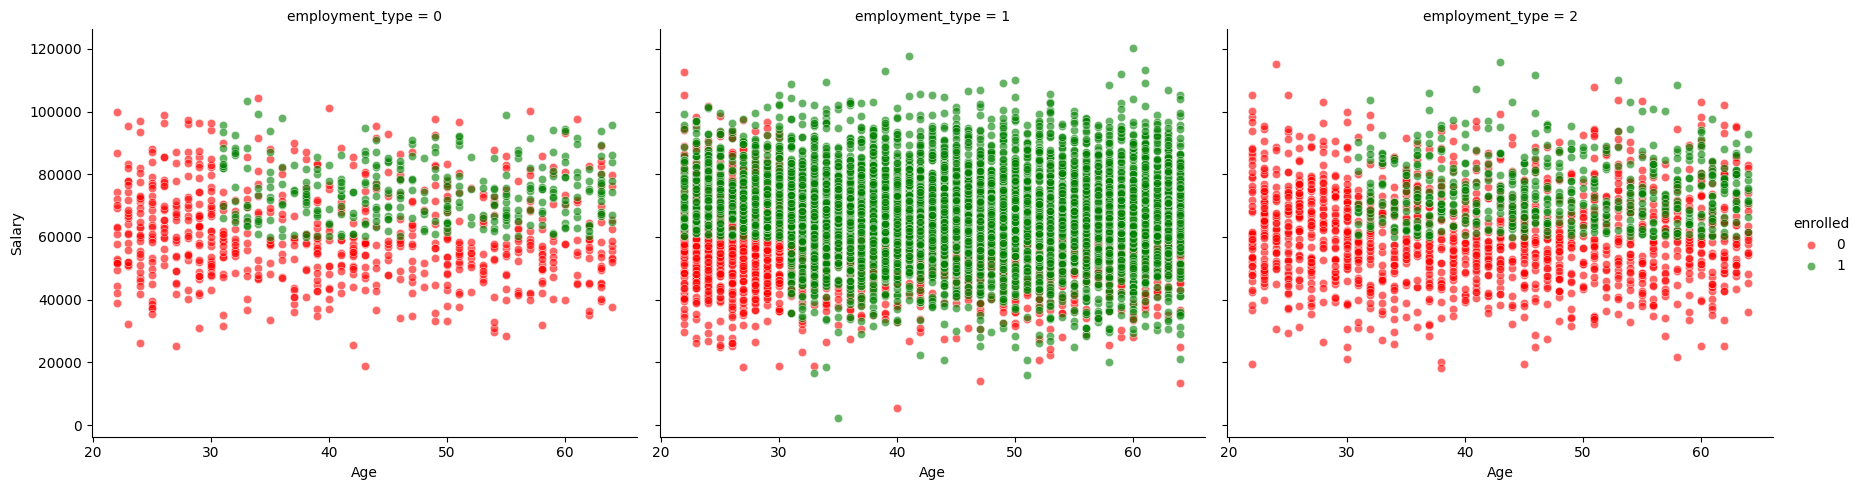

In [4]:
palette = {0: "red", 1: "green"} 
print(labels_employment_type)
data['employment_type'] = data['employment_type'].astype('category')
data['enrolled'] = data['enrolled'].astype('category')
g = sns.FacetGrid(data, col='employment_type', hue='enrolled', palette=palette, height=5, aspect=1.2)
g.map(sns.scatterplot, 'age', 'salary', alpha=0.6)
g.add_legend()
g.set_axis_labels("Age", "Salary")
plt.show()

### Data Visualization S2:
* Plot below analysis the in-depth reasons for enrollment yes/no based on the type of employment.
* It shows dependents plays a key role for even part-time and contract to get enrolled. 

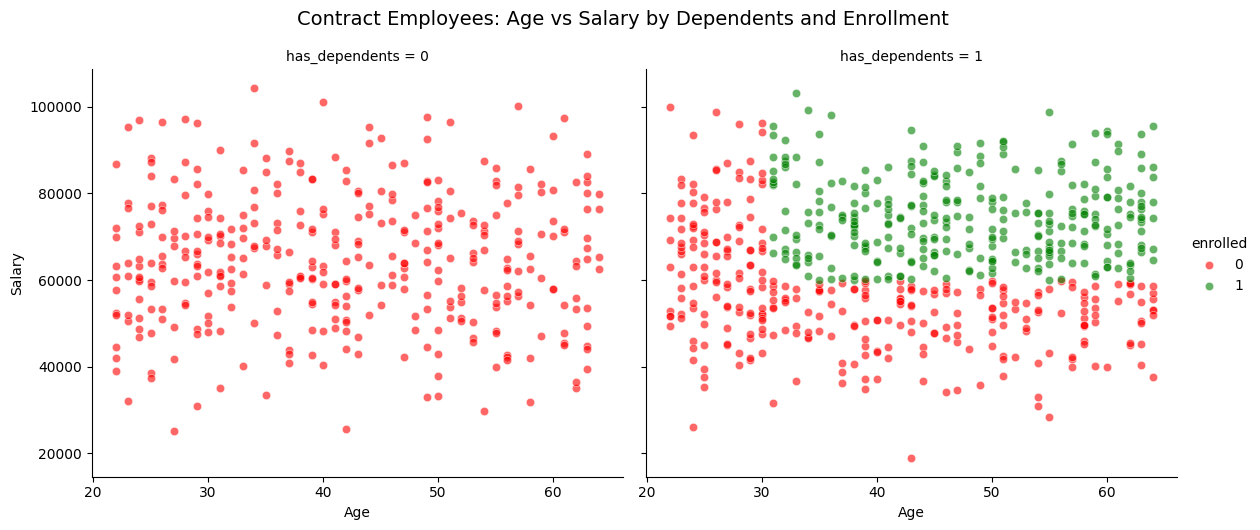

<Figure size 640x480 with 0 Axes>

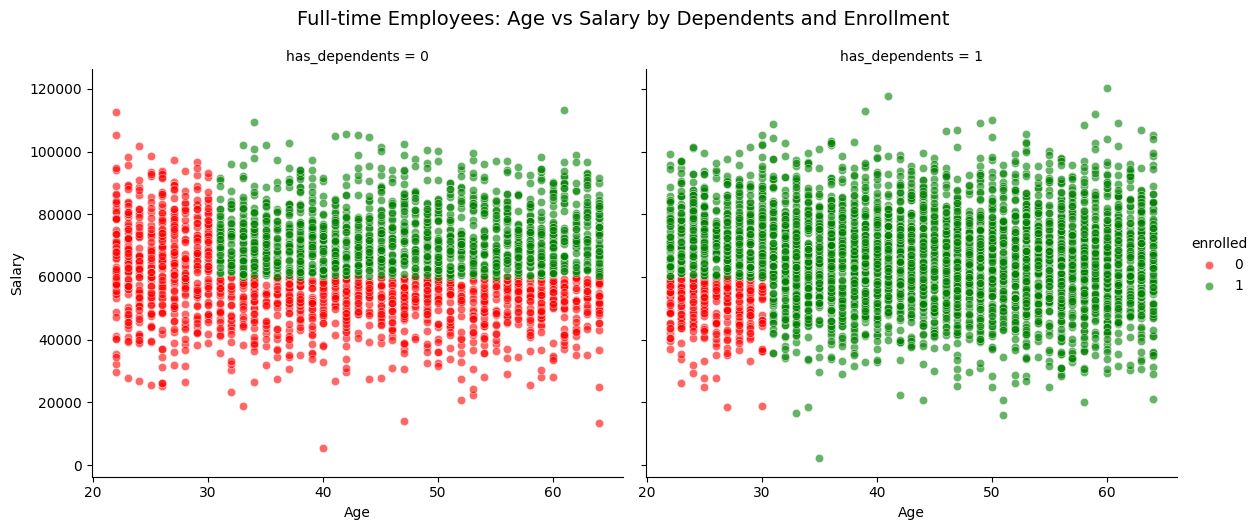

<Figure size 640x480 with 0 Axes>

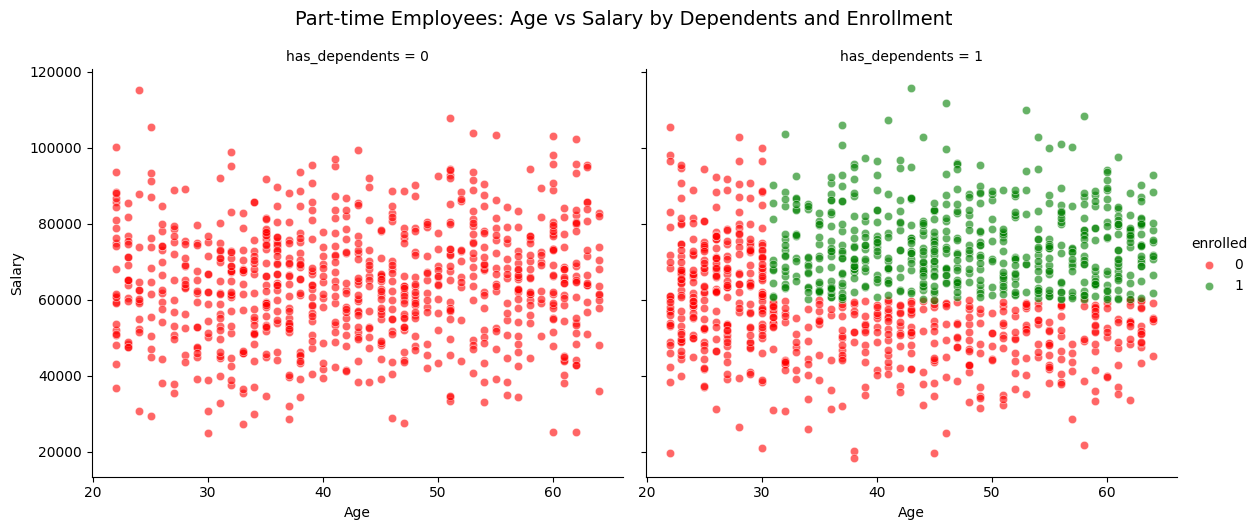

<Figure size 640x480 with 0 Axes>

In [5]:
employment_types = [0,1,2]
inverse_employment_labels = {j:i for i,j in labels_employment_type.items()}

for emp_type in employment_types:
    subset = data[data["employment_type"] == emp_type]
    g = sns.FacetGrid(subset, col='has_dependents', hue='enrolled', palette=palette, height=5, aspect=1.2)
    g.map(sns.scatterplot, 'age', 'salary', alpha=0.6)
    g.add_legend()
    g.set_axis_labels("Age", "Salary")
    g.fig.suptitle(f"{inverse_employment_labels[emp_type]} Employees: Age vs Salary by Dependents and Enrollment", fontsize=14, y=1.05)
    plt.show()

    plt.savefig("vis.png")

### Correlation study 

<Axes: >

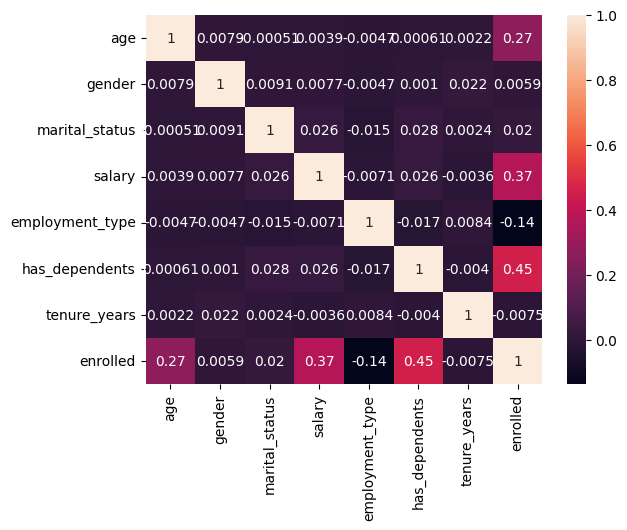

In [6]:
sns.heatmap(data.corr(),annot=True)

#### ML modelling
* A Logical interpretable model
  ```Decision Tree is Beautiful```

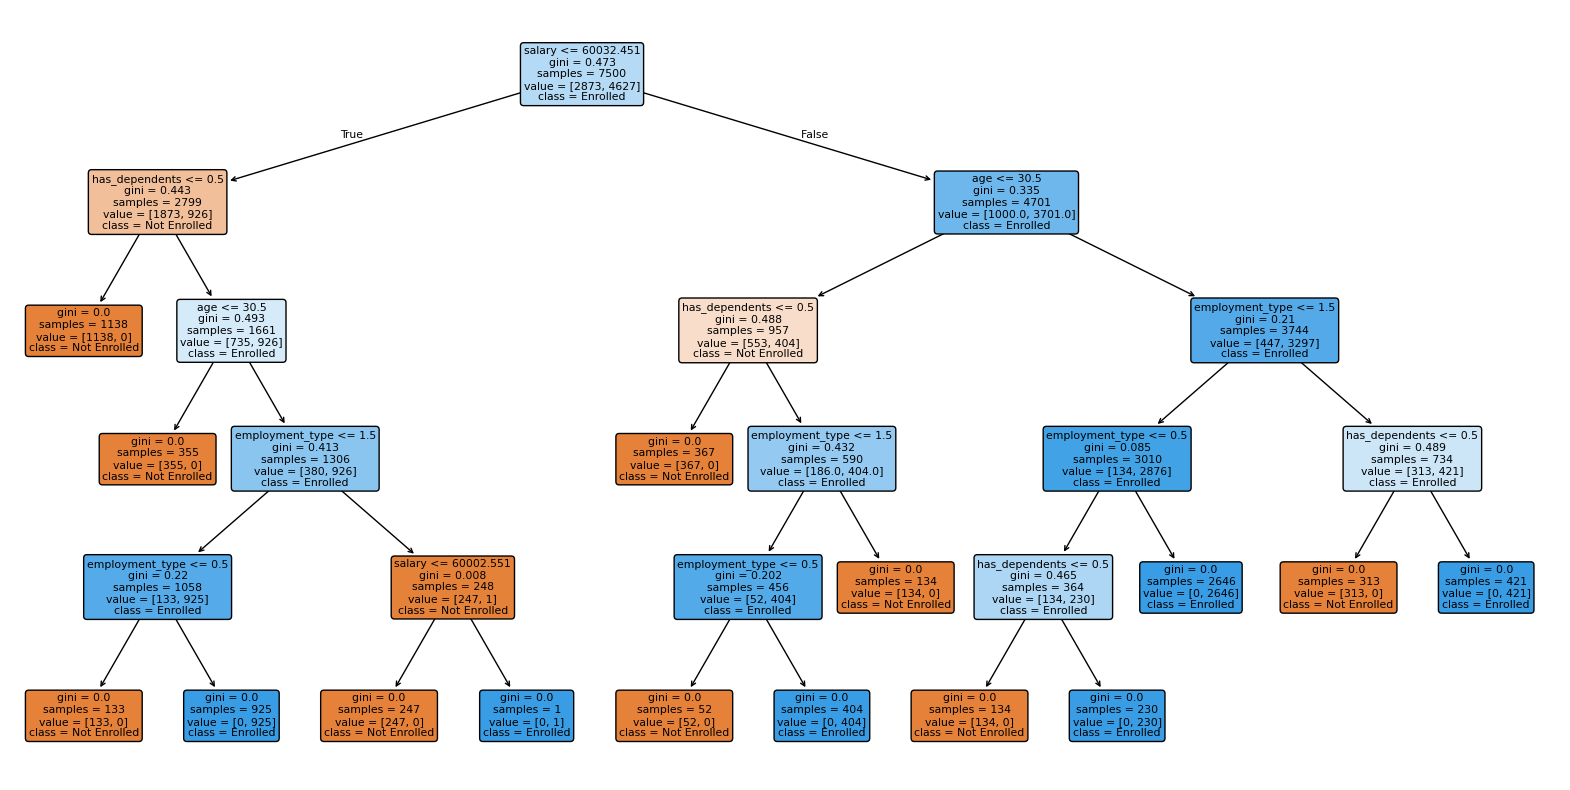

In [7]:
feat = ["age","gender","salary","employment_type","has_dependents"]
X = data[feat]
Y = data["enrolled"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(x_train, y_train)

y_pred = tree_model.predict(x_test)
report = classification_report(y_test, y_pred, output_dict=True)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=feat, class_names=["Not Enrolled", "Enrolled"], filled=True, rounded=True)
plt.show()

In [8]:
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.998952,1.000000,0.9996,0.999476,0.9996
recall,1.000000,0.999354,0.9996,0.999677,0.9996
f1-score,0.999476,0.999677,0.9996,0.999576,0.9996
support,953.000000,1547.000000,0.9996,2500.000000,2500.0000
